In [215]:
base = '/u/ebanner/Classes/nlp/Project/irony-classifier'

In [213]:
base = '/u/npockrus/NLP/finalProject/venv/src/irony-classifier'

# Load Subreddits and Labels

In [216]:
cd /{base}/data/conservative/features/text+sentiment+subreddit+label+progressiviness/

/v/filer4b/v20q001/ebanner/Classes/nlp/Project/irony-classifier/data/conservative/features/text+sentiment+subreddit+label+progressiviness


In [217]:
import pickle
import scipy
import numpy as np

with open('features.p', 'r') as f:
    data = pickle.load(f)

subreddits = np.array([data[sentence]['subreddits'] for sentence in sorted(data)])
ys = np.array([ data[sentence]['label'] for sentence in sorted(data) ])

# Frequency Counts

In [218]:
from collections import defaultdict

all = defaultdict(int)
for subreddit_list in subreddits:
    for subreddit in subreddit_list:
        all[subreddit] += 1

# Get Breakdown for Every Subreddit

In [219]:
from collections import defaultdict

ironics = defaultdict(int)
for subreddit_list, y in zip(subreddits, ys):
    if y == 1:
        for subreddit in subreddit_list:
            ironics[subreddit] += 1

In [220]:
from collections import defaultdict

genuines = defaultdict(int)
for subreddit_list, y in zip(subreddits, ys):
    if y == -1:
        for subreddit in subreddit_list:
            genuines[subreddit] += 1

In [221]:
for subreddit in all:
    assert genuines[subreddit] + ironics[subreddit] == all[subreddit]

# Generate Parallel List for All, Ironics, and Genuines

In [222]:
import operator

subreddit_list = [0]*len(all)
ironic_list, genuine_list, all_list = [0]*len(all), [0]*len(all), [0]*len(all)
for i, pair in enumerate(sorted(all.items(), key=operator.itemgetter(1), reverse=True)):
    subreddit, count = pair
    
    subreddit_list[i] = subreddit
    ironic_list[i], genuine_list[i], all_list[i] = ironics[subreddit], genuines[subreddit], all[subreddit]
    
# Sanity Check
for subreddit, irony, genuine, a in zip(subreddit_list, ironic_list, genuine_list, all_list):
    assert irony + genuine == a
    assert ironics[subreddit] + genuines[subreddit] == all[subreddit]

# Normalize

In [223]:
num_ironics = len([ y for y in ys if y ==  1 ])
num_genuines = len([ y for y in ys if y == -1 ])

In [224]:
normalized_ironics = [ (count+1)/(float(num_ironics)+1) for count in ironic_list ]
normalized_genuines = [ (count+1)/(float(num_genuines)+1) for count in genuine_list ]

# Compute Similarity + Smoothing

In [225]:
divergences = [ float(ironic)/genuine for ironic, genuine in zip(normalized_ironics, normalized_genuines) ]

# Most Indicitave Subreddits for Genuine Sentences

In [239]:
# Number of Subreddits
N = 10

In [240]:
top_subreddits = [ subreddit for divergence, subreddit in sorted(zip(divergences, subreddit_list)) ][:N]
top_divergences = [ divergence for divergence, subreddit in sorted(zip(divergences, subreddit_list)) ][:N]

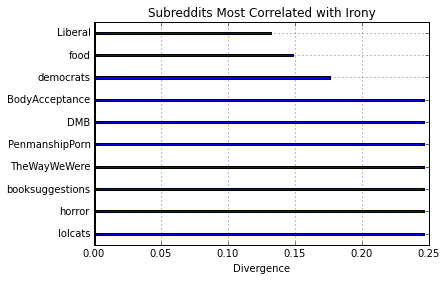

In [241]:
import matplotlib
import pylab

pos = arange(N)+.5
pylab.figure(1)

pylab.barh(pos, top_divergences[::-1], align='center', height=0.1)    # notice the 'height' argument

pylab.yticks(pos, top_subreddits[::-1])

pylab.gca().axvline(0, color='k', lw=3)

pylab.xlabel('Divergence')
pylab.title('Subreddits Most Correlated with Irony')
pylab.grid(True)
show()

# Most Indicitave Subreddits for Ironic Sentences

In [229]:
N = 10

In [230]:
bottom_subreddits = [ subreddit for divergence, subreddit in sorted(zip(divergences, subreddit_list), reverse=True) ][:N]
bottom_divergences = [ divergence for divergence, subreddit in sorted(zip(divergences, subreddit_list), reverse=True) ][:N]

In [231]:
%matplotlib inline

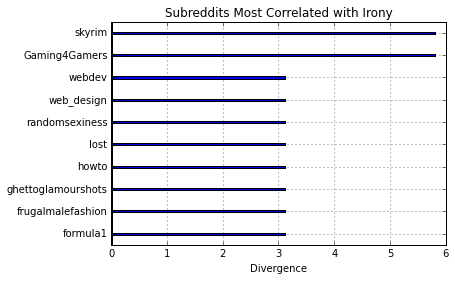

In [238]:
import matplotlib
import pylab

pos = arange(N)+.5
pylab.figure(1)

pylab.barh(pos, bottom_divergences[::-1], align='center', height=0.1)    # notice the 'height' argument

pylab.yticks(pos, bottom_subreddits[::-1])

pylab.gca().axvline(0, color='k', lw=3)

pylab.xlabel('Divergence')
pylab.title('Subreddits Most Correlated with Irony')
pylab.grid(True)
show()

# Divergences for All Subreddits (Most Common First)

In [244]:
N = len(all)

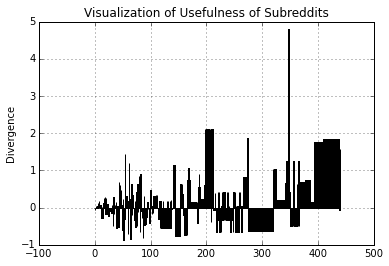

In [248]:
import matplotlib.pyplot as plt

fig = plt.figure()
axes = fig.add_subplot(111)

indicies = np.arange(N)

rectangles = axes.bar(range(N), [ divergence-1 for divergence in divergences], align='center')

plt.ylabel('Divergence')
plt.title('Visualization of Usefulness of Subreddits')
plt.grid(True)
    
plt.show()